# Proyek Analisis Data: [Bike-shanring_Dataset]
- **Nama:** Annisa Silvia Chaniago
- **Email:** M183B4KX0585@bangkit.academy
- **ID Dicoding:** M183B4KX0585

## Menentukan Pertanyaan Bisnis

- Bagaimana permintaan (jumlah sewa) berbeda di antara musim yang berbeda?
- Apakah hari libur mempengaruhi jumlah sewa sepeda?
- Apakah ada perbedaan dalam permintaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import contextlib


## Data Wrangling

### Gathering Data

Membuat dataFrame dari data day_csv dan hour_csv

In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/kyunisoo/Bike-sharing-dataset/refs/heads/main/day.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/kyunisoo/Bike-sharing-dataset/refs/heads/main/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari dua data yaitu data hari (day.csv) dan data jam (hour.csv).
- Masing-masing data memiliki kolom yang sama, namun isi data yang berbeda.

### Assessing Data

Pada bagian ini kita akan mencari info dari masing-masing data.

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mencari duplikasi dari masing-masing data

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Deskripsi dari masing-masing data

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada data day.csv maupun hour.csv sudah terlihat bersih dan tidak terjadi duplikasi dari masing-masing data.
- Pada saat melakukan .info() saya menemukan adanya ketidaksesuaian penggunaan type data yaitu pada bagian dteday yang mana disitu type datanya object, seharusnya diubah menjadi datetime, lalu untuk kolom season, yr, mnth, hr, holiday, weekday, dan weathersit dapat diubah menjadi tipe category untuk efisiensi dan analisis lebih baik.

### Cleaning Data

Merubah nama kolom pada day.csv dan hour.csv

In [12]:
dteday_columns = ["dteday"]

for column in dteday_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

Mengubah data type pada season, yr, mnth, holiday, weekday, weathersit menjadi category pada day.csv dan hour.csv

In [17]:
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

day_df[category_columns] = day_df[category_columns].astype('category')

In [18]:
category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'weathersit']

hour_df[category_columns] = hour_df[category_columns].astype('category')

Menampilkan kembali info dari masing-masing data

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pada kolom dteday berhasil diubah data typenya menjadi datetime sehingga penggunaannya akan jauh lebih baik
- pada kolom season, yr, hr, mnth, holiday, dan weekend juga sudah berhasil diubah menjadi category

## Exploratory Data Analysis (EDA)

Mencari bagaimana permintaan (jumlah sewa) berbeda di antara musim yang berbeda

kalsifikasikan musim berdasarkan bulan supaya lebih mudah untuk menganalisanya

In [43]:
print("\nData dari day.csv (Setelah Mengubah Kolom Season):")
print(day_df[['dteday', 'season']].head())

print("\nData dari hour.csv (Setelah Mengubah Kolom Season):")
print(hour_df[['dteday', 'season']].head())


Data dari day.csv (Setelah Mengubah Kolom Season):
      dteday  season
0 2011-01-01  Winter
1 2011-01-02  Winter
2 2011-01-03  Winter
3 2011-01-04  Winter
4 2011-01-05  Winter

Data dari hour.csv (Setelah Mengubah Kolom Season):
      dteday  season
0 2011-01-01  Winter
1 2011-01-01  Winter
2 2011-01-01  Winter
3 2011-01-01  Winter
4 2011-01-01  Winter


In [38]:
def classify_season(month):
    if month in [12, 1, 2]:
        return 1  # Musim Dingin
    elif month in [3, 4, 5]:
        return 2  # Musim Semi
    elif month in [6, 7, 8]:
        return 3  # Musim Panas
    elif month in [9, 10, 11]:
        return 4  # Musim Gugur

day_df['season'] = day_df['mnth'].apply(classify_season)

print(day_df[['mnth', 'season']].drop_duplicates())

    mnth  season
0      1       1
31     2       1
59     3       2
90     4       2
120    5       2
151    6       3
181    7       3
212    8       3
243    9       4
273   10       4
304   11       4
334   12       1


In [56]:
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}


day_df['season'] = day_df['season'].replace(season_labels)
hour_df['season'] = hour_df['season'].replace(season_labels)

print(day_df[['mnth', 'season']].drop_duplicates())

     mnth  season
0       1  Winter
31      2  Winter
59      3  Winter
79      3  Spring
90      4  Spring
120     5  Spring
151     6  Spring
171     6  Summer
181     7  Summer
212     8  Summer
243     9  Summer
265     9    Fall
273    10    Fall
304    11    Fall
334    12    Fall
354    12  Winter


In [57]:
print(hour_df[['mnth', 'season']].drop_duplicates())

      mnth  season
0        1  Winter
688      2  Winter
1337     3  Winter
1807     3  Spring
2067     4  Spring
2786     5  Spring
3530     6  Spring
4010     6  Summer
4250     7  Summer
4994     8  Summer
5725     9  Summer
6250     9    Fall
6442    10    Fall
7185    11    Fall
7904    12    Fall
8384    12  Winter


### Explore ...

Menghitung Rata-rata dan Total Permintaan per Musim

In [34]:
seasonal_data = day_df.groupby('season')['cnt'].sum().reset_index()

<ipython-input-34-760e6d3f0729>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = day_df.groupby('season')['cnt'].sum().reset_index()


In [35]:
print("Data peminjaman sepeda per musim:")
print(seasonal_data)

Data peminjaman sepeda per musim:
  season      cnt
0      1   471348
1      2   918589
2      3  1061129
3      4   841613


In [29]:
season_stats = day_df.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
season_stats.columns = ['season', 'average_demand', 'total_demand']

season_stats['season_label'] = season_stats['season'].map(season_labels)

print(season_stats)

  season  average_demand  total_demand season_label
0      1     2604.132597        471348       Winter
1      2     4992.331522        918589       Spring
2      3     5644.303191       1061129       Summer
3      4     4728.162921        841613         Fall


<ipython-input-29-4a065f1cc4dc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_stats = day_df.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()


Menghitung Rata-rata dan Total Permintaan berdasarkan Hari Libur

In [22]:
holiday_stats = day_df.groupby('holiday')['cnt'].agg(['mean', 'sum']).reset_index()
holiday_stats.columns = ['holiday', 'average_demand', 'total_demand']

print(holiday_stats)

  holiday  average_demand  total_demand
0       0     4527.104225       3214244
1       1     3735.000000         78435


<ipython-input-22-0e8326a6c975>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_stats = day_df.groupby('holiday')['cnt'].agg(['mean', 'sum']).reset_index()


Menghitung Rata-rata dan Total Permintaan berdasarkan Hari dalam Seminggu:

In [53]:
weather_stats = day_df.groupby('weathersit')['cnt'].agg(['mean']).reset_index()
weather_labels = {1: 'Cuaca cerah', 2: 'Kabut', 3: 'Salju ringan', 4: 'Hujan'}
weather_stats['weather_label'] = weather_stats['weathersit'].map(weather_labels)

print(weather_stats)

   weathersit         mean weather_label
0           1  4876.786177   Cuaca cerah
1           2  4035.862348         Kabut
2           3  1803.285714  Salju ringan


**Insight:**
- Melalukan season mapping supaya mudah mengkategori datanya.
- Melakukan pencarian data dari pertanyaan bisnis yang sudah saya kasih, dan dengan begini dapat dilihat numeriknya dari masing-masing hal yang ingin di insight


## Visualization & Explanatory Analysis

Bagaimana permintaan (jumlah sewa) berbeda di antara musim yang berbeda?


<ipython-input-45-921fa1865d34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_stats, x='season_label', y='average_demand', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

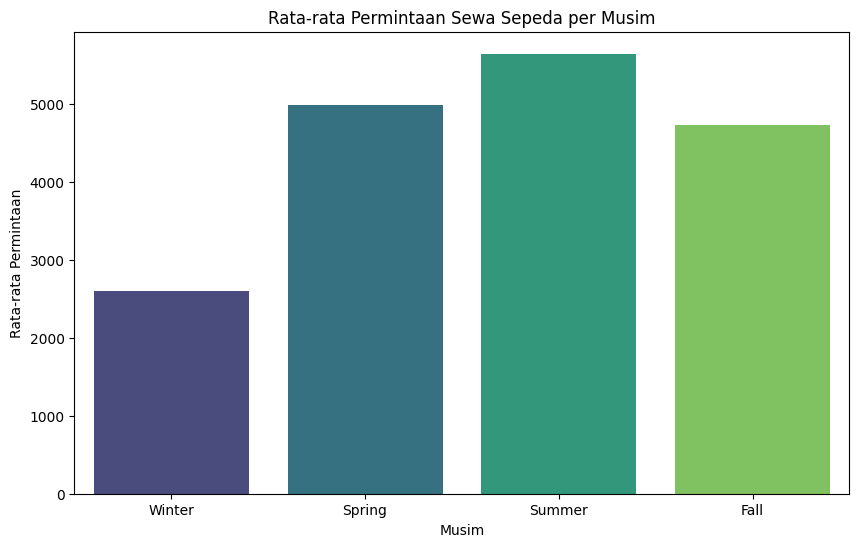

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=season_stats, x='season_label', y='average_demand', palette='viridis')
plt.title('Rata-rata Permintaan Sewa Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Permintaan')
plt.xticks(rotation=0)
plt.show()


Apakah hari libur mempengaruhi jumlah sewa sepeda?


<ipython-input-25-18fcc31a3d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_stats, x='holiday', y='average_demand', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


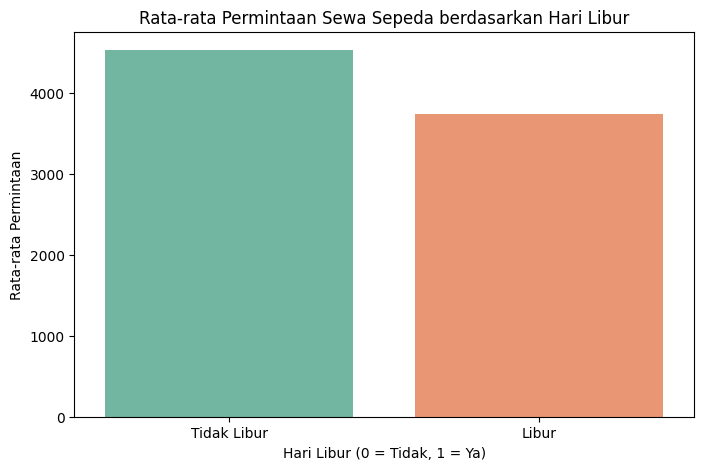

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_stats, x='holiday', y='average_demand', palette='Set2')
plt.title('Rata-rata Permintaan Sewa Sepeda berdasarkan Hari Libur')
plt.xlabel('Hari Libur (0 = Tidak, 1 = Ya)')
plt.ylabel('Rata-rata Permintaan')
plt.xticks(ticks=[0, 1], labels=['Tidak Libur', 'Libur'], rotation=0)
plt.show()


Apakah cuaca berpengaruh untuk penyewaan sepeda?

<ipython-input-54-04e06d7fe2c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_stats, x='weather_label', y='mean', palette='mako')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

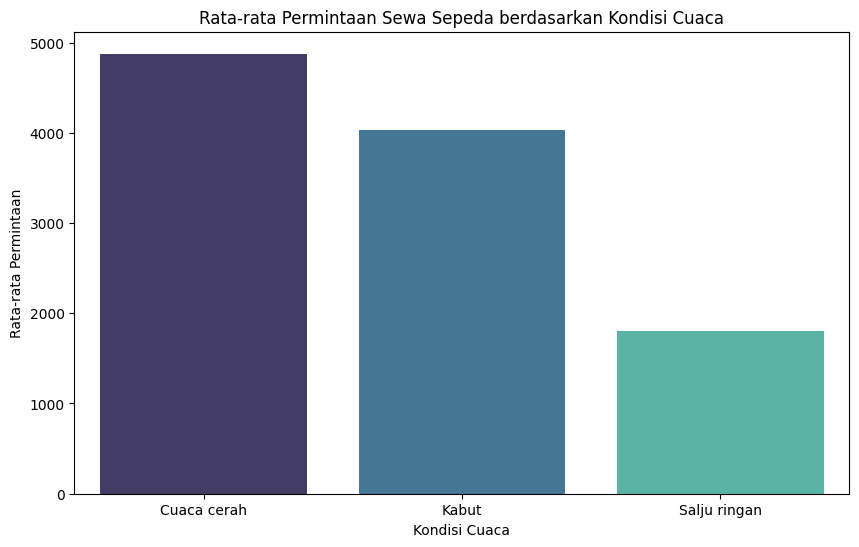

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_stats, x='weather_label', y='mean', palette='mako')
plt.title('Rata-rata Permintaan Sewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Permintaan')
plt.show()

**Insight:**
- Menggunakan Bar untuk melihat hasil yang ingin dicari.
- Semua pertanyaan terjawab dari bar yang sudah ditampilkan. Seperti Musim

## Analisis Lanjutan (Opsional)

<ipython-input-55-a17e23872612>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_stats, x='weekday', y='average_demand', palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

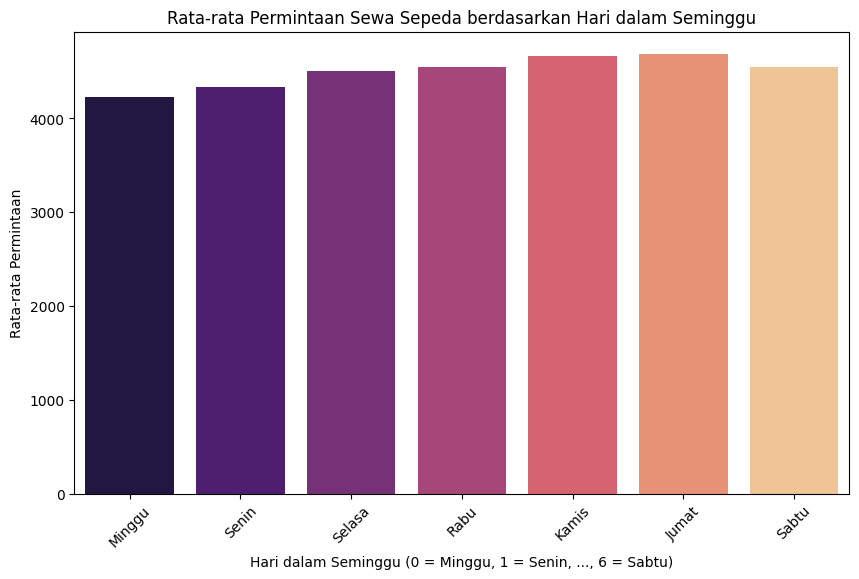

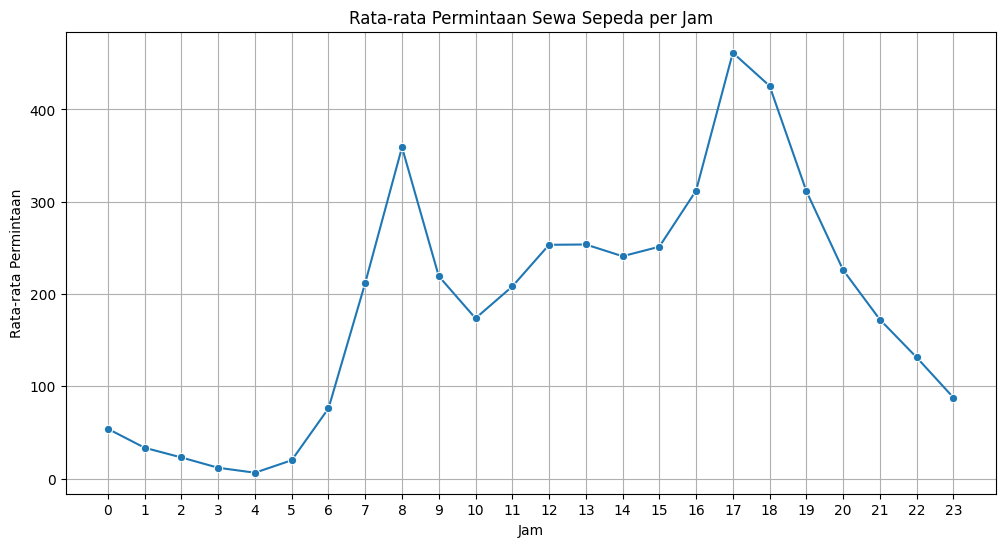

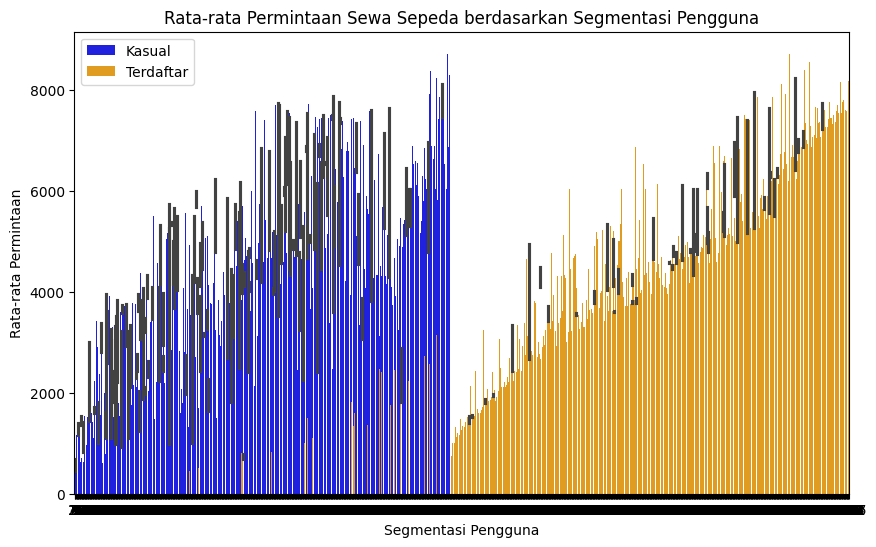

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
day_df = pd.read_csv('https://raw.githubusercontent.com/kyunisoo/Bike-sharing-dataset/refs/heads/main/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/kyunisoo/Bike-sharing-dataset/refs/heads/main/hour.csv')

# Menghitung rata-rata permintaan berdasarkan hari dalam seminggu
weekday_stats = day_df.groupby('weekday')['cnt'].agg(['mean', 'sum']).reset_index()
weekday_stats.columns = ['weekday', 'average_demand', 'total_demand']

# Visualisasi pengaruh hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_stats, x='weekday', y='average_demand', palette='magma')
plt.title('Rata-rata Permintaan Sewa Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 1 = Senin, ..., 6 = Sabtu)')
plt.ylabel('Rata-rata Permintaan')
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'], rotation=45)
plt.show()

# Menghitung rata-rata permintaan berdasarkan jam
hour_stats = hour_df.groupby('hr')['cnt'].agg(['mean']).reset_index()

# Visualisasi rata-rata permintaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_stats, x='hr', y='mean', marker='o')
plt.title('Rata-rata Permintaan Sewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Permintaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# **6. Segmentasi Pengguna**
# Menghitung rata-rata permintaan untuk pengguna kasual dan terdaftar
user_stats = day_df.groupby(['casual', 'registered']).agg({'cnt': 'mean'}).reset_index()

# Visualisasi segmentasi pengguna
plt.figure(figsize=(10, 6))
sns.barplot(data=user_stats, x='casual', y='cnt', color='blue', label='Kasual')
sns.barplot(data=user_stats, x='registered', y='cnt', color='orange', label='Terdaftar')
plt.title('Rata-rata Permintaan Sewa Sepeda berdasarkan Segmentasi Pengguna')
plt.xlabel('Segmentasi Pengguna')
plt.ylabel('Rata-rata Permintaan')
plt.legend()
plt.show()


## Conclusion



1. Pengaruh Musim terhadap Penyewaan Sepeda
Hasil analisis menunjukkan bahwa musim panas (summer) adalah periode dengan tingkat penyewaan sepeda tertinggi. Hal ini dapat dijelaskan oleh sejumlah faktor, termasuk cuaca yang lebih hangat dan panjangnya jam siang, yang mendorong lebih banyak orang untuk beraktivitas di luar ruangan. Selain itu, selama musim panas, terdapat banyak kegiatan dan acara luar ruangan, seperti festival dan liburan, yang juga berkontribusi pada peningkatan permintaan penyewaan sepeda.

2. Pengaruh Hari Libur pada Penyewaan Sepeda
Analisis juga menunjukkan bahwa hari libur cenderung memiliki tingkat penyewaan sepeda yang lebih rendah dibandingkan dengan hari kerja (weekday). Pada hari libur, banyak orang memilih untuk bersantai di rumah atau melakukan aktivitas yang tidak melibatkan penyewaan sepeda, sedangkan pada hari kerja, terdapat lebih banyak individu yang melakukan perjalanan untuk bekerja atau menjalani aktivitas sehari-hari. Ini menunjukkan bahwa kegiatan luar ruangan lebih umum terjadi pada hari kerja, sehingga meningkatkan permintaan penyewaan sepeda.

3. Pengaruh Cuaca terhadap Penyewaan Sepeda
Dari hasil analisis, jelas bahwa cuaca memiliki pengaruh signifikan terhadap penyewaan sepeda. Terbukti bahwa permintaan penyewaan meningkat secara drastis pada hari-hari dengan cuaca cerah. Orang-orang cenderung lebih memilih untuk bersepeda ketika kondisi cuaca mendukung, karena cuaca cerah memberikan pengalaman yang lebih menyenangkan. Oleh karena itu, penyewa sepeda sebaiknya memperhatikan ramalan cuaca untuk mengoptimalkan strategi penyewaan mereka, dengan mempersiapkan lebih banyak sepeda pada hari-hari cerah.